# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"
units="metric"
city="city name"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&q={city}&units={units}"
    #url + "appid=" + weather_api_key + "&q=" + city "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        response= requests.get(city_url)
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kameyama
Processing Record 2 of Set 1 | qapqal
City not found. Skipping...
Processing Record 3 of Set 1 | pyapon
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | maros
City not found. Skipping...
Processing Record 8 of Set 1 | darwin
Processing Record 9 of Set 1 | luganville
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | lazaro cardenas
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | mundri
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | skovorodino
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | kourou
Processing Record 20 of Set 1 | garachico
Processing Record 21 of Set 1 |

Processing Record 36 of Set 4 | petropavlovsk-kamchatsky
Processing Record 37 of Set 4 | eforie sud
Processing Record 38 of Set 4 | yuzhno-kurilsk
Processing Record 39 of Set 4 | haiku-pauwela
Processing Record 40 of Set 4 | lichuan
Processing Record 41 of Set 4 | ust-nera
Processing Record 42 of Set 4 | polyarnyy
Processing Record 43 of Set 4 | medina
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | baskil
Processing Record 46 of Set 4 | fort-shevchenko
Processing Record 47 of Set 4 | corato
Processing Record 48 of Set 4 | yangambi
Processing Record 49 of Set 4 | new norfolk
Processing Record 0 of Set 5 | cidreira
Processing Record 1 of Set 5 | severo-yeniseyskiy
Processing Record 2 of Set 5 | konarka
Processing Record 3 of Set 5 | usogorsk
Processing Record 4 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 5 of Set 5 | kununurra
Processing Record 6 of Set 5 | asosa
Processing Record 7 of Set 5 | banda aceh
Processing Record 8 of Set 5 | nguigm

Processing Record 23 of Set 8 | alice springs
Processing Record 24 of Set 8 | mangrol
Processing Record 25 of Set 8 | portland
Processing Record 26 of Set 8 | farasan
Processing Record 27 of Set 8 | mana
Processing Record 28 of Set 8 | anori
Processing Record 29 of Set 8 | al bawiti
Processing Record 30 of Set 8 | alesund
Processing Record 31 of Set 8 | novaya igirma
Processing Record 32 of Set 8 | manaus
Processing Record 33 of Set 8 | bir hadaj
City not found. Skipping...
Processing Record 34 of Set 8 | tsiombe
Processing Record 35 of Set 8 | tezonapa
Processing Record 36 of Set 8 | emet
Processing Record 37 of Set 8 | esquina
Processing Record 38 of Set 8 | megion
Processing Record 39 of Set 8 | kattivakkam
Processing Record 40 of Set 8 | tonghae
Processing Record 41 of Set 8 | sosnovskoye
Processing Record 42 of Set 8 | akureyri
Processing Record 43 of Set 8 | moyale
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | leh
Pro

Processing Record 12 of Set 12 | uruacu
Processing Record 13 of Set 12 | suva
Processing Record 14 of Set 12 | nagykanizsa
Processing Record 15 of Set 12 | okha
Processing Record 16 of Set 12 | laramie
Processing Record 17 of Set 12 | chhibramau
Processing Record 18 of Set 12 | jiangyou
Processing Record 19 of Set 12 | lompoc
Processing Record 20 of Set 12 | torrington
Processing Record 21 of Set 12 | peterhead
Processing Record 22 of Set 12 | mushie
Processing Record 23 of Set 12 | kirando
Processing Record 24 of Set 12 | kemijarvi
Processing Record 25 of Set 12 | posto fiscal rolim de moura
Processing Record 26 of Set 12 | mersing
Processing Record 27 of Set 12 | natal
Processing Record 28 of Set 12 | midvagur
Processing Record 29 of Set 12 | hammerfest
Processing Record 30 of Set 12 | cavan
Processing Record 31 of Set 12 | greymouth
Processing Record 32 of Set 12 | loen
Processing Record 33 of Set 12 | vazante
Processing Record 34 of Set 12 | san carlos
Processing Record 35 of Set 1

In [16]:
#viewing the list that has all the city data 
city_data


[{'City': 'kameyama',
  'Lat': 34.85,
  'Lng': 136.45,
  'Max Temp': 16.66,
  'Humidity': 91,
  'Cloudiness': 100,
  'Wind Speed': 2.67,
  'Country': 'JP',
  'Date': 1713210091},
 {'City': 'pyapon',
  'Lat': 16.2833,
  'Lng': 95.6833,
  'Max Temp': 28.02,
  'Humidity': 68,
  'Cloudiness': 0,
  'Wind Speed': 4.12,
  'Country': 'MM',
  'Date': 1713210092},
 {'City': 'san patricio',
  'Lat': 28.017,
  'Lng': -97.5169,
  'Max Temp': 28.92,
  'Humidity': 71,
  'Cloudiness': 100,
  'Wind Speed': 9.79,
  'Country': 'US',
  'Date': 1713210092},
 {'City': 'edinburgh of the seven seas',
  'Lat': -37.0676,
  'Lng': -12.3116,
  'Max Temp': 15.23,
  'Humidity': 65,
  'Cloudiness': 15,
  'Wind Speed': 6.01,
  'Country': 'SH',
  'Date': 1713210092},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 1.45,
  'Humidity': 79,
  'Cloudiness': 16,
  'Wind Speed': 8.12,
  'Country': 'GS',
  'Date': 1713209880},
 {'City': 'darwin',
  'Lat': -12.4611,
  'Lng': 130.8418,
  'Max Temp': 

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kameyama,34.8500,136.4500,16.66,91,100,2.67,JP,1713210091
1,pyapon,16.2833,95.6833,28.02,68,0,4.12,MM,1713210092
2,san patricio,28.0170,-97.5169,28.92,71,100,9.79,US,1713210092
3,edinburgh of the seven seas,-37.0676,-12.3116,15.23,65,15,6.01,SH,1713210092
4,grytviken,-54.2811,-36.5092,1.45,79,16,8.12,GS,1713209880


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kameyama,34.8500,136.4500,16.66,91,100,2.67,JP,1713210091
1,pyapon,16.2833,95.6833,28.02,68,0,4.12,MM,1713210092
2,san patricio,28.0170,-97.5169,28.92,71,100,9.79,US,1713210092
3,edinburgh of the seven seas,-37.0676,-12.3116,15.23,65,15,6.01,SH,1713210092
4,grytviken,-54.2811,-36.5092,1.45,79,16,8.12,GS,1713209880


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

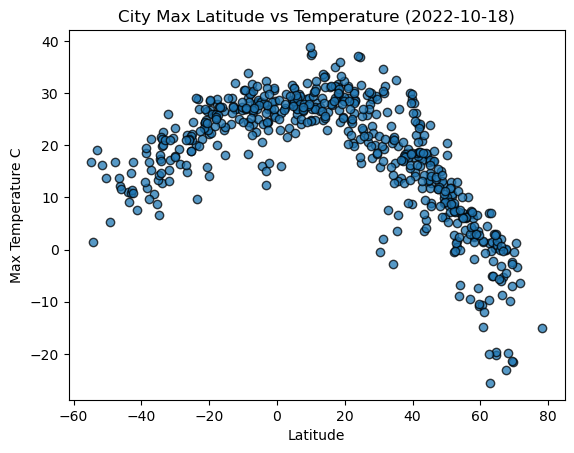

In [21]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,alpha=0.75, edgecolor='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature C')
plt.title('City Max Latitude vs Temperature (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

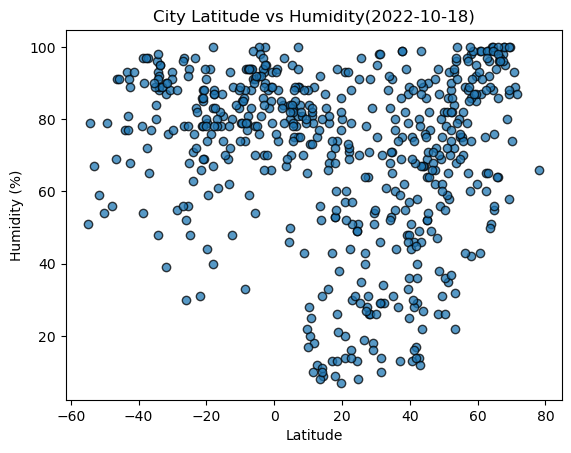

In [22]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,alpha=0.75, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity(2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

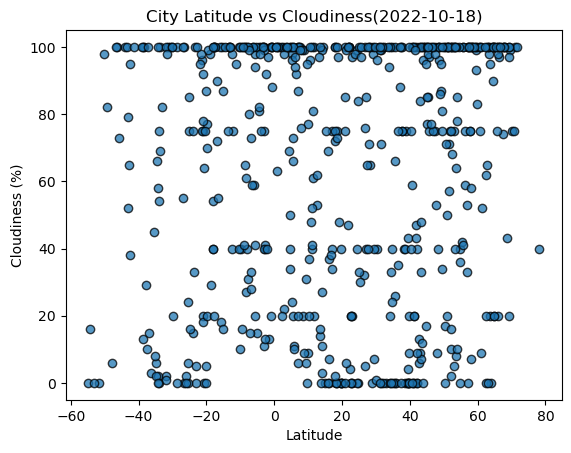

In [23]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,alpha=0.75, edgecolor='black')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness(2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

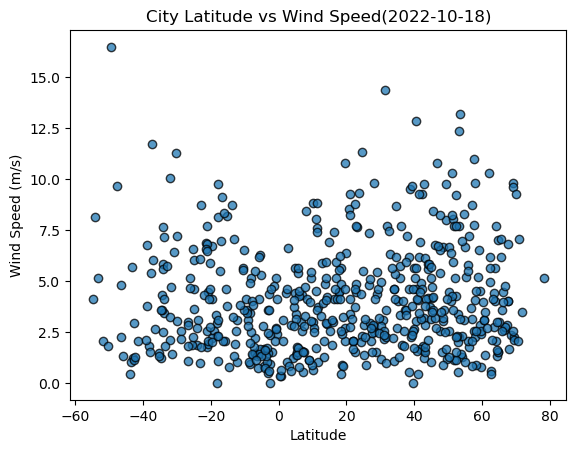

In [24]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,alpha=0.75, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed(2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kameyama,34.8500,136.4500,16.66,91,100,2.67,JP,1713210091
1,pyapon,16.2833,95.6833,28.02,68,0,4.12,MM,1713210092
2,san patricio,28.0170,-97.5169,28.92,71,100,9.79,US,1713210092
7,hawaiian paradise park,19.5933,-154.9731,25.50,86,0,2.68,US,1713210093
9,lazaro cardenas,17.9583,-102.2000,29.32,53,100,4.47,MX,1713210093


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,15.23,65,15,6.01,SH,1713210092
4,grytviken,-54.2811,-36.5092,1.45,79,16,8.12,GS,1713209880
5,darwin,-12.4611,130.8418,26.99,80,98,2.57,AU,1713210093
6,luganville,-15.5333,167.1667,26.66,87,100,4.60,VU,1713210093
8,margaret river,-33.9500,115.0667,12.73,88,0,3.43,AU,1713209983


###  Temperature vs. Latitude Linear Regression Plot

The r value is: 0.7258527163852283


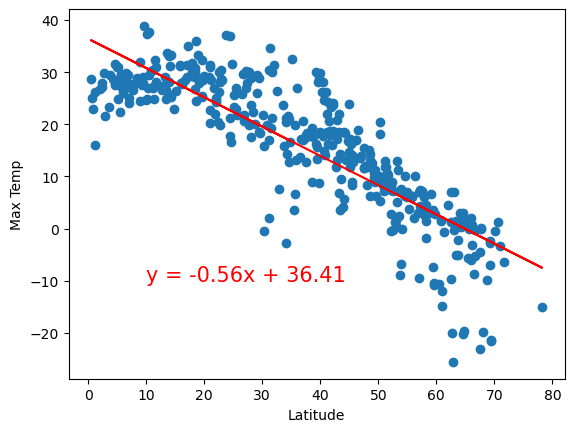

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat'] 
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r value is: {rvalue**2}")
plt.show()

The r value is: 0.5536600968553689


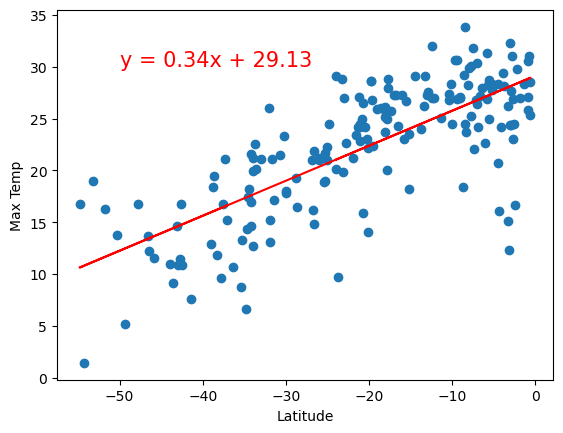

In [38]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: There is a positive relationship/correlation between the temperature and latitude in the southern hemisphere while a negative relationship exists between temp and lat in the Northern hemisphere.72% of the changes in temperature is being predicted by the latitude in the northern hemisphere while 55% of the changes in temperature is being predicted by the latitude in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.04834915346205645


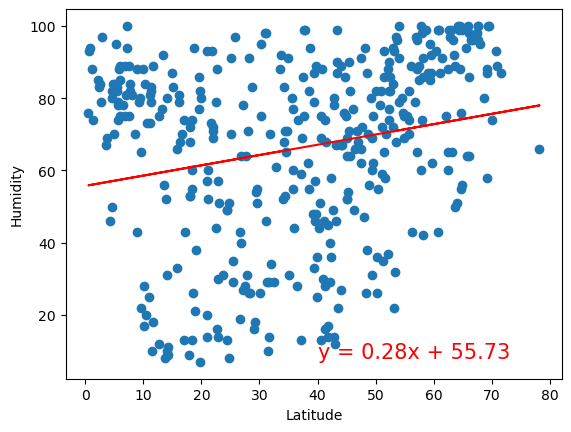

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r value is: {rvalue**2}")
plt.show()

The r value is: 0.021362290242499044


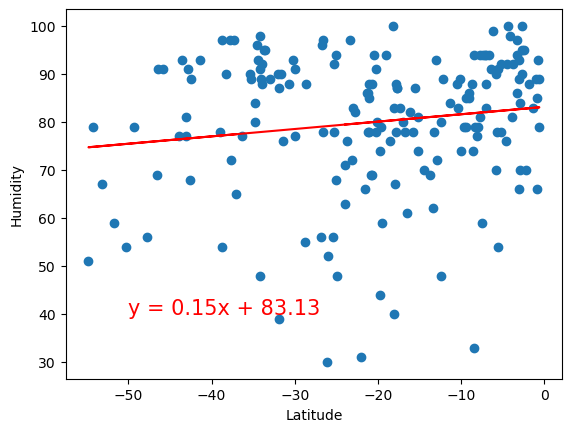

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:There is a positive relationship/correlation between the Humidity and latitude in both the Northern and Southern Hemisphere.4.8%of the changes in Humidity is being predicted by the latitude in the northern hemisphere while 2.1% of the changes in Humidity is being predicted by the latitude in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.019705996276887336


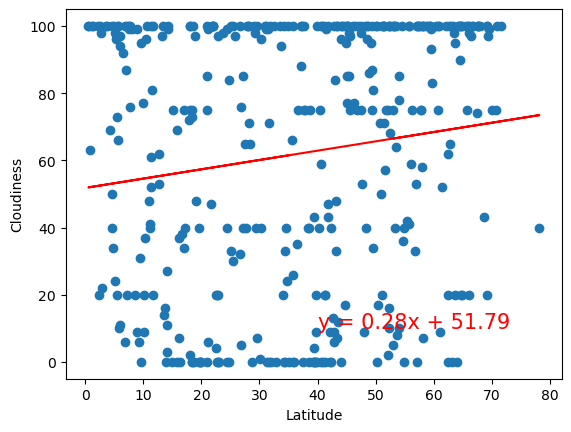

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r value is: {rvalue**2}")
plt.show()

The r value is: 0.03550767072931247


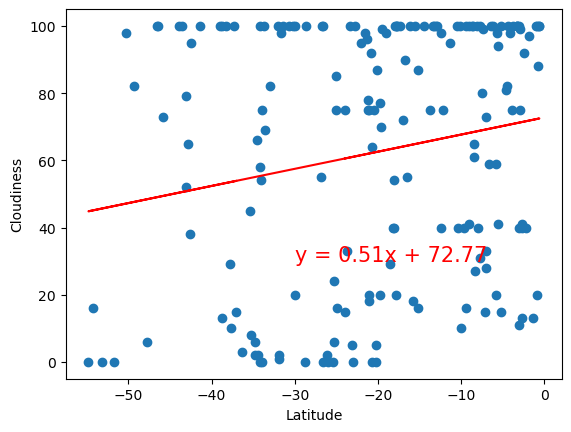

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:There is a negative relationship/correlation between the Cloudiness and latitude in both the Northern and Southern Hemisphere.1.9% of the changes in Cloudiness is being predicted by the latitude in the northern hemisphere while 3.5% of the changes in Cloudiness is being predicted by the latitude in the southern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.01264169045585224


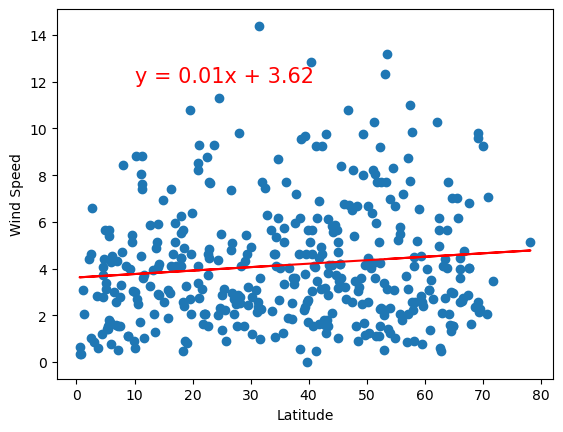

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r value is: {rvalue**2}")
plt.show()

The r value is: 0.048943421248968444


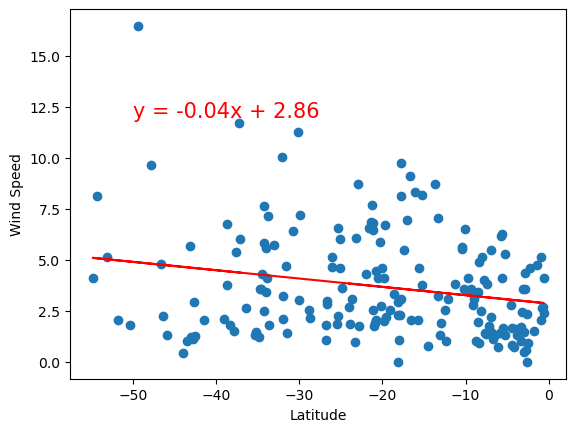

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:There is a positive relationship/correlation between the Windspeed and latitude in the southern hemisphere while a negative relationship exists between Windspeed and lat in the Northern hemisphere.1.2% of the changes in temperature is being predicted by the latitude in the northern hemisphere while 4.8% of the changes in Wind Speed is being predicted by the latitude in the southern hemisphere